In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path1='/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv'
features = ['Gender','Age','Hypertension','heart disease','smoking_history','BMI','HbA1c_level','blood_glucose_level']
target= ['class']            
df = pd.read_csv(path1,header=None,names=features + ['target'])
df=df.drop([0],axis=0)
display(df)
#df.head()

<ipython-input-34-2fab8c7571a8>:16: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path1,header=None,names=features + ['target'])


,Gender,Age,Hypertension,heart disease,smoking_history,BMI,HbA1c_level,blood_glucose_level,target
1,Female,80,0,1,never,25.19,6.6,140,0
2,Female,54,0,0,No Info,27.32,6.6,80,0
3,Male,28,0,0,never,27.32,5.7,158,0
4,Female,36,0,0,current,23.45,5,155,0
5,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,Female,80.0,0,0,No Info,27.32,6.2,90,0
99997,Female,2.0,0,0,No Info,17.37,6.5,100,0
99998,Male,66.0,0,0,former,27.83,5.7,155,0
99999,Female,24.0,0,0,never,35.42,4.0,100,0


In [111]:
# Two features are found to have string values, they must be convertef to numerical values before training
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Gender']))}
df['Gender'] = df['Gender'].map(class_mapping)
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['smoking_history']))}
df['smoking_history'] = df['smoking_history'].map(class_mapping)
df

,Gender,Age,Hypertension,heart disease,smoking_history,BMI,HbA1c_level,blood_glucose_level,target
1,0,80,0,1,4,25.19,6.6,140,0
2,0,54,0,0,0,27.32,6.6,80,0
3,1,28,0,0,4,27.32,5.7,158,0
4,0,36,0,0,1,23.45,5,155,0
5,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,0,80.0,0,0,0,27.32,6.2,90,0
99997,0,2.0,0,0,0,17.37,6.5,100,0
99998,1,66.0,0,0,3,27.83,5.7,155,0
99999,0,24.0,0,0,4,35.42,4.0,100,0


<Axes: >

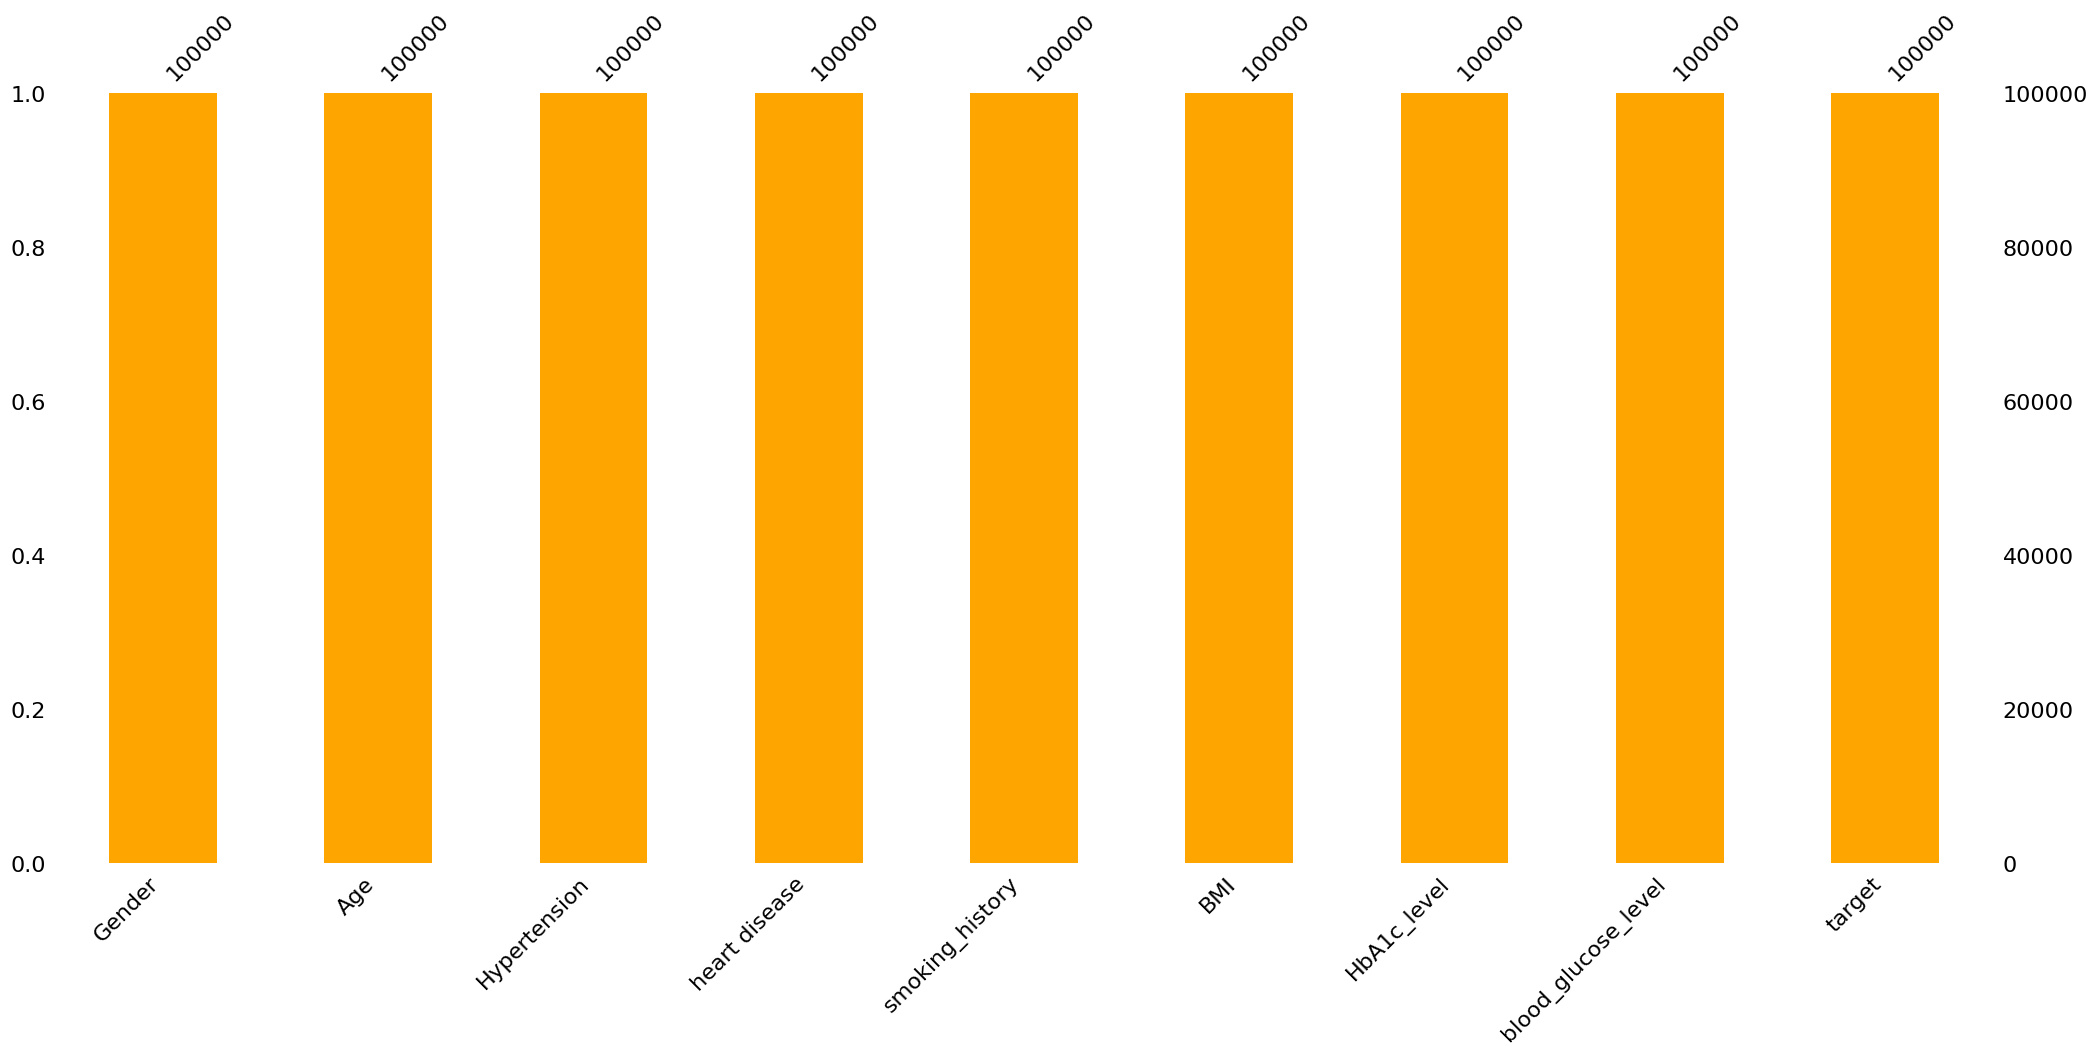

In [ ]:
# Assuring no missing data after converting
msno.bar(df, color = "orange")

In [ ]:
# Forming input and output array and finding the class labels
X = df.iloc[0:,0:-1].values
X=X.astype('float64')
print(X)
y = df.iloc[0:,-1].values
y=y.astype('int64')
print (y)
print('Class labels:', np.unique(y))

[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]
[0 0 0 ... 0 0 0]
Class labels: [0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)

In [ ]:
# Standardizing the dataset before training
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# setting colors for plotting charts
blue_cmap = LinearSegmentedColormap.from_list('custom blue', ['#ffff00','#002266'],N=256)

In [ ]:
#importing necessary classifier functions
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# class function for calculating performance matrix
def metrics_calculator(clf, X_valid, y_valid, model_name):
    y_pred = clf.predict(X_test_std)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [ ]:
def model_evaluation(clf, X_train_std, X_test_std, y_train, y_test, model_name):
    y_pred_train = clf.predict(X_train_std)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))
    y_pred_test = clf.predict(X_test_std)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    result = metrics_calculator(clf, X_test_std, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=12)
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('cyan')
              
    ConfusionMatrixDisplay.from_estimator(clf, X_test_std, y_test, colorbar=False, cmap=blue_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
    plt.tight_layout()
    plt.show() 

In [ ]:
#Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train_std,y_train)
prediction_tree = decision_tree.predict(X_test_std)
pred_prob = decision_tree.predict_proba(X_test_std)
as_tree = accuracy_score(y_test,prediction_tree)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82371
           1       1.00      0.99      0.99      7629

    accuracy                           1.00     90000
   macro avg       1.00      0.99      1.00     90000
weighted avg       1.00      1.00      1.00     90000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9129
           1       0.72      0.76      0.74       871

    accuracy                           0.95     10000
   macro avg       0.85      0.87      0.86     10000
weighted avg       0.95      0.95      0.95     10000





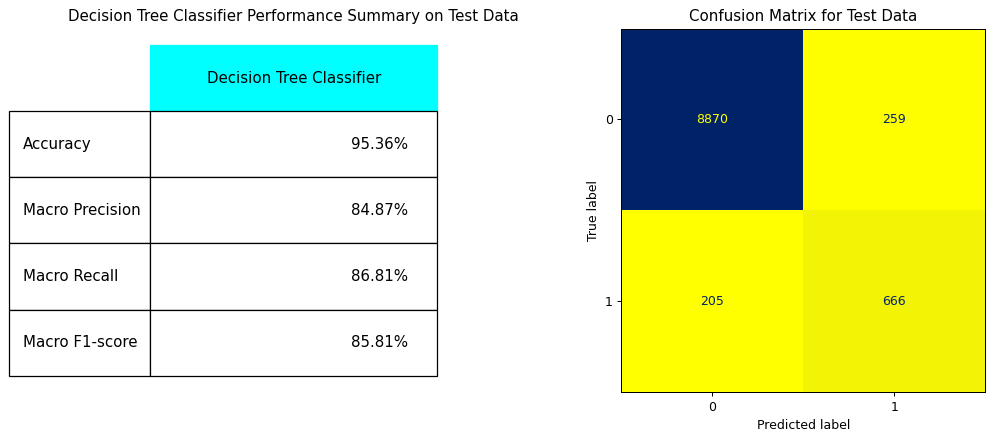

In [ ]:
model_evaluation(decision_tree,X_train_std, X_test_std, y_train, y_test, 'Decision Tree Classifier')

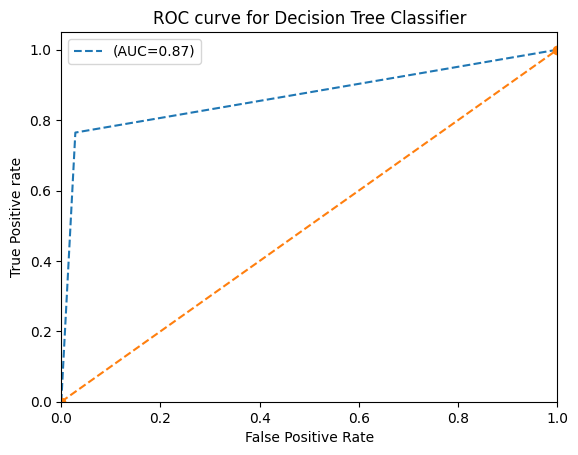

In [ ]:
# ROC curve for Decision Tree Classifier
from sklearn.metrics import roc_curve,auc

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

  
fpr, tpr, thresh = roc_curve(y_test,prediction_tree)
roc_auc= auc(fpr, tpr)
    
    # plotting    
plt.plot(fpr, tpr, linestyle='--', label='(AUC=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='upper left')
plt.show()

In [ ]:
M1='%d' %(y_test != prediction_tree).sum()
print('Misclassified examples:')
print(M1)

Misclassified examples:
464


In [ ]:
#Random Forest Classifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train_std, y_train)
predictions_forest = forest_model.predict(X_test_std)
pred_prob = forest_model.predict_proba(X_test_std)
as_forest = accuracy_score(y_test, predictions_forest)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82365
           1       1.00      0.99      0.99      7635

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9135
           1       0.94      0.69      0.79       865

    accuracy                           0.97     10000
   macro avg       0.95      0.84      0.89     10000
weighted avg       0.97      0.97      0.97     10000





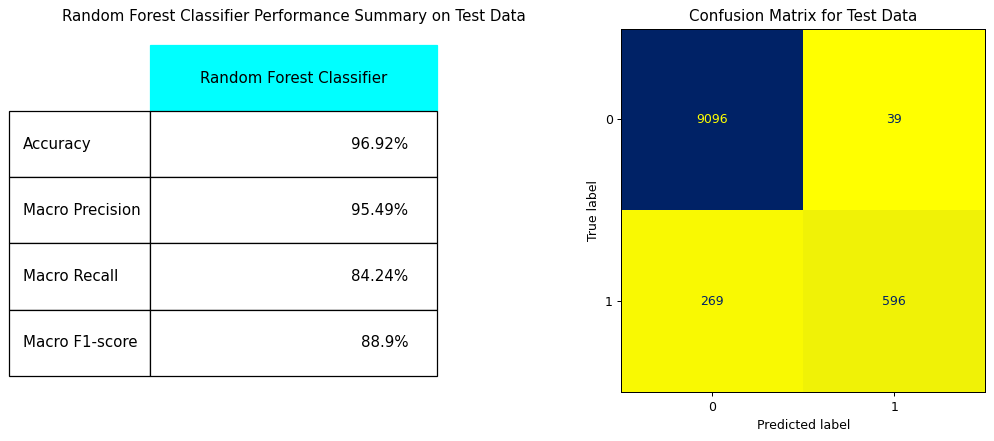

In [ ]:
model_evaluation(forest_model, X_train_std, X_test_std, y_train, y_test, 'Random Forest Classifier')

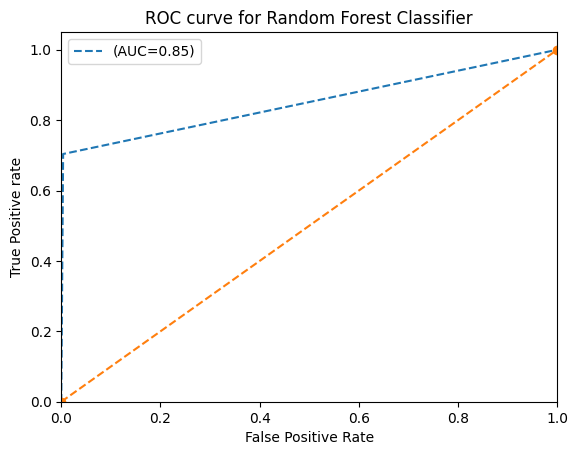

In [ ]:
# ROC curve for Random Forest Classifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

  
fpr, tpr, thresh = roc_curve(y_test,predictions_forest)
roc_auc= auc(fpr, tpr)
    
    # plotting    
plt.plot(fpr, tpr, linestyle='--', label='(AUC=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='upper left')
plt.show()

In [ ]:
M2='%d' %(y_test != predictions_forest).sum()
print('Misclassified examples:')
print(M2)

Misclassified examples:
292


In [ ]:
#XGBoost Classifier
model_xgboost = XGBClassifier(n_estimators=100, random_state=0, learning_rate=0.05)
model_xgboost.fit(X_train_std, y_train)
predictions_xgboost = model_xgboost.predict(X_test_std)
pred_prob = model_xgboost.predict_proba(X_test_std)
as_xgboost = accuracy_score(y_test, predictions_xgboost)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     82371
           1       1.00      0.67      0.80      7629

    accuracy                           0.97     90000
   macro avg       0.98      0.83      0.89     90000
weighted avg       0.97      0.97      0.97     90000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9129
           1       1.00      0.69      0.81       871

    accuracy                           0.97     10000
   macro avg       0.98      0.84      0.90     10000
weighted avg       0.97      0.97      0.97     10000





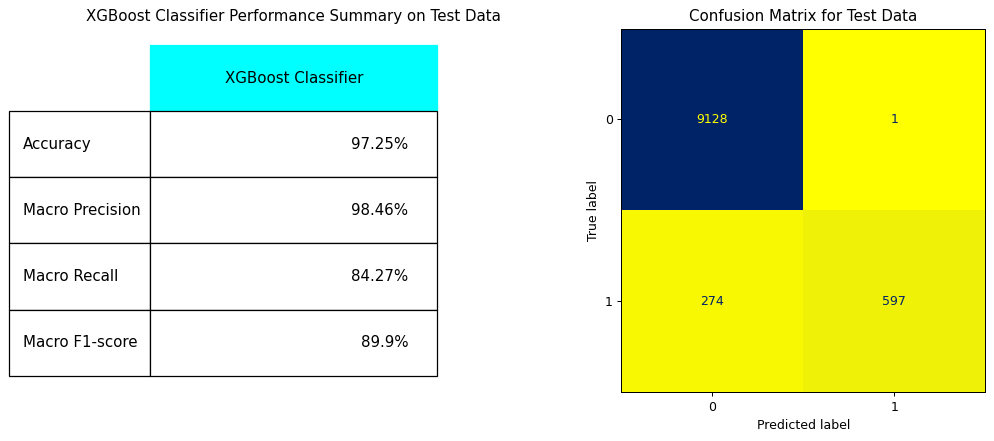

In [ ]:
model_evaluation(model_xgboost, X_train_std, X_test_std, y_train, y_test, 'XGBoost Classifier')

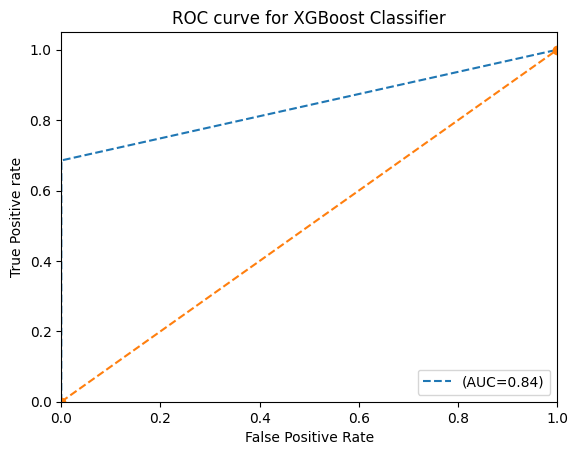

In [ ]:
# ROC curve for XGBoost Classifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

  
fpr, tpr, thresh = roc_curve(y_test,predictions_xgboost)
roc_auc= auc(fpr, tpr)
    
    # plotting    
plt.plot(fpr, tpr, linestyle='--', label='(AUC=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve for XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
M3='%d' %(y_test != predictions_xgboost).sum()
print('Misclassified examples:')
print(M3)

Misclassified examples:
275


In [ ]:
#Support Vector Classifier
model_svm = SVC()
model_svm.fit(X_train_std, y_train)
predictions_svc= model_svm.predict(X_test_std)
#pred_prob = model_svm.predict_proba(X_test_std)
as_svc = accuracy_score(y_test, predictions_svc)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     82365
           1       0.98      0.59      0.74      7635

    accuracy                           0.96     90000
   macro avg       0.97      0.80      0.86     90000
weighted avg       0.97      0.96      0.96     90000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9135
           1       0.98      0.58      0.73       865

    accuracy                           0.96     10000
   macro avg       0.97      0.79      0.86     10000
weighted avg       0.96      0.96      0.96     10000





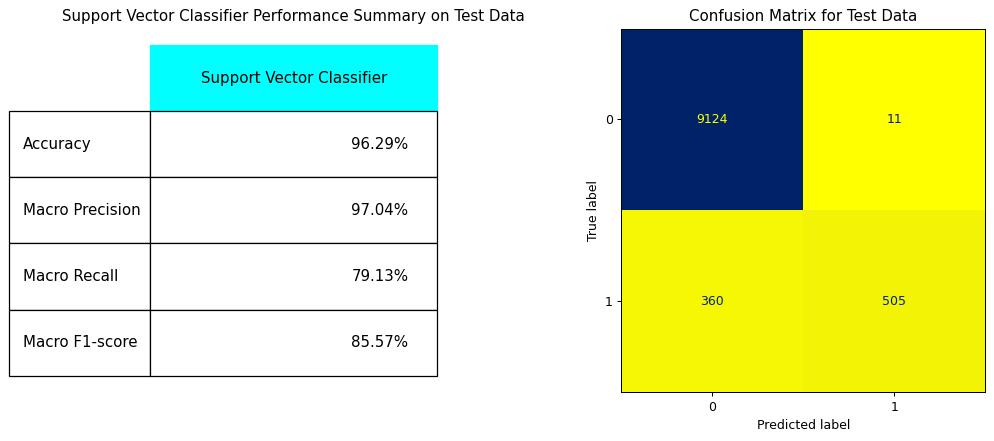

In [ ]:
model_evaluation(model_svm, X_train_std, X_test_std, y_train, y_test, 'Support Vector Classifier')

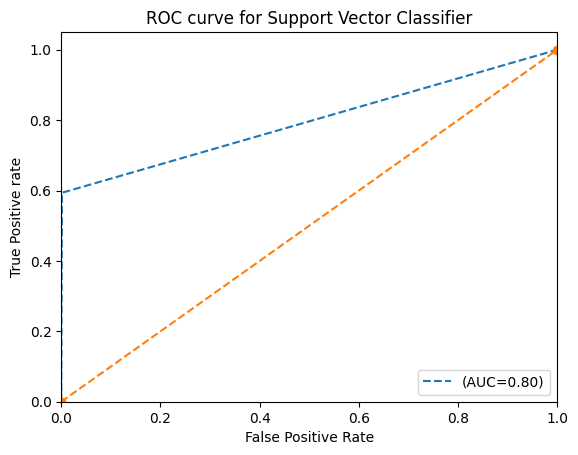

In [ ]:
# ROC curve for Support Vector Classifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

  
fpr, tpr, thresh = roc_curve(y_test,predictions_svc)
roc_auc= auc(fpr, tpr)
    
    # plotting    
plt.plot(fpr, tpr, linestyle='--', label='(AUC=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve for Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
M4='%d' %(y_test != predictions_svc).sum()
print('Misclassified examples:')
print(M4)

Misclassified examples:
365


[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]
[0.6000000000000001, 1.6, 2.6]


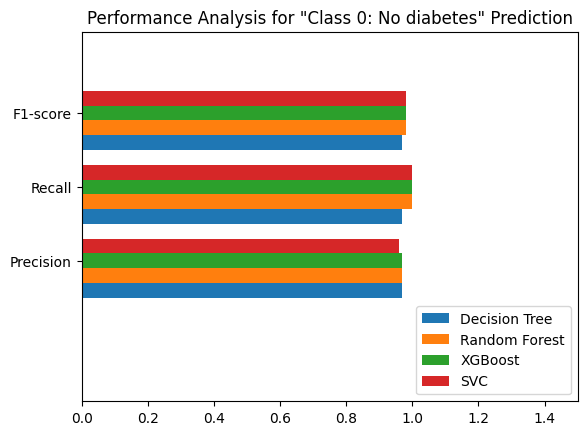

In [103]:
# Comparison among models
models = ["Decision Tree","Random Forest","XGBoost","SVC"]
performance=["Precision", "Recall", "F1-score"]
DT=[0.97,	0.97,	0.97]
RF=[0.97,	1.00,	0.98]
XG=[0.97,	1.00,	0.98]
SVC=[0.96,1.00,	0.98]
w=0.2
dtbar=np.arange(len(performance))
print(dtbar)
rfbar= [i+w for i in dtbar]
print(rfbar)
xgbar= [i+2*w for i in dtbar]
print(xgbar)
svcbar= [i+3*w for i in dtbar]
print(svcbar)
plt.barh(dtbar,DT,w,label="Decision Tree")
plt.barh(rfbar,RF,w,label="Random Forest")
plt.barh(xgbar,XG,w,label="XGBoost")
plt.barh(svcbar,SVC,w,label="SVC")

plt.ylim([-1.5,3.5])
plt.xlim([0,1.5])
plt.title('Performance Analysis for "Class 0: No diabetes" Prediction')
#plt.xlabel('ML Models')
plt.yticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]
[0.6000000000000001, 1.6, 2.6]


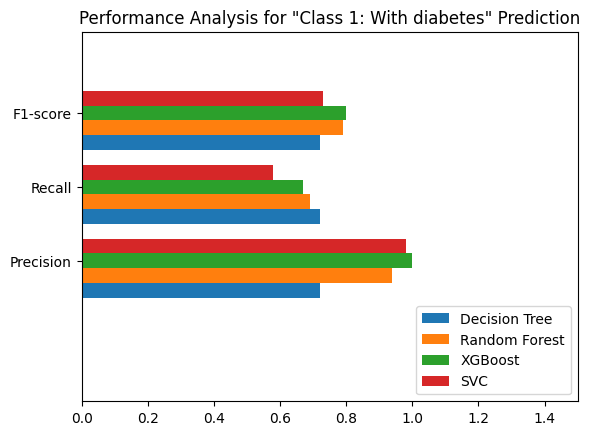

In [104]:
models = ["Decision Tree","Random Forest","XGBoost","SVC"]
performance=["Precision", "Recall", "F1-score"]
DT=[0.72,     0.72,      0.72 ]
RF=[0.94,      0.69,     0.79]
XG=[1.00 ,     0.67 ,     0.80]
SVC=[0.98 ,     0.58 ,     0.73]
w=0.2
dtbar=np.arange(len(performance))
print(dtbar)
rfbar= [i+w for i in dtbar]
print(rfbar)
xgbar= [i+2*w for i in dtbar]
print(xgbar)
svcbar= [i+3*w for i in dtbar]
print(svcbar)
plt.barh(dtbar,DT,w,label="Decision Tree")
plt.barh(rfbar,RF,w,label="Random Forest")
plt.barh(xgbar,XG,w,label="XGBoost")
plt.barh(svcbar,SVC,w,label="SVC")

plt.ylim([-1.5,3.5])
plt.xlim([0,1.5])
plt.title('Performance Analysis for "Class 1: With diabetes" Prediction')
#plt.xlabel('ML Models')
plt.yticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

[0 1]
[0.2, 1.2]
[0.4, 1.4]
[0.6000000000000001, 1.6]


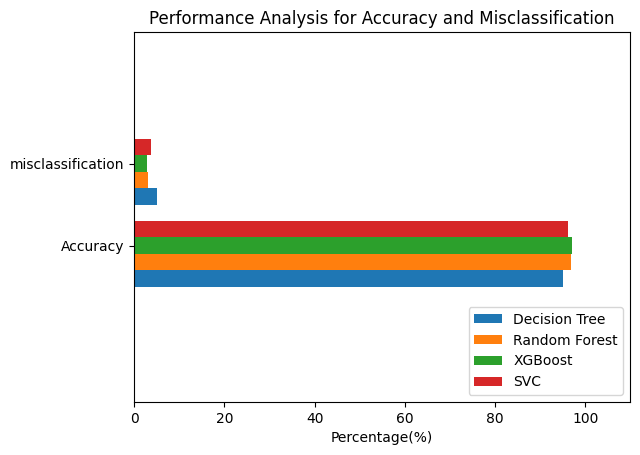

In [110]:
models = ["Decision Tree","Random Forest","XGBoost","SVC"]
performance=["Accuracy", "misclassification"]
DT=[94.99 ,   495*100/10000        ]
RF=[96.92,     308*100/10000        ]
XG=[97.13,    287*100/10000         ]
SVC=[96.29 ,   371*100/10000         ]
w=0.2
dtbar=np.arange(len(performance))
print(dtbar)
rfbar= [i+w for i in dtbar]
print(rfbar)
xgbar= [i+2*w for i in dtbar]
print(xgbar)
svcbar= [i+3*w for i in dtbar]
print(svcbar)
plt.barh(dtbar,DT,w,label="Decision Tree")
plt.barh(rfbar,RF,w,label="Random Forest")
plt.barh(xgbar,XG,w,label="XGBoost")
plt.barh(svcbar,SVC,w,label="SVC")

plt.ylim([-1.5,3])
plt.xlim([0,110])
plt.title('Performance Analysis for Accuracy and Misclassification')
plt.xlabel('Percentage(%)')
plt.yticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()